## Product Reviews Sentiment Analysis

In [1]:
import re
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',150)

In [2]:
!python --version


Python 3.11.4


In [4]:
import os # os module provides access to system features
os.chdir("D:/Nlp")
#dataset=pd.read_csv("Amazon_Sentiment_Text.csv",encoding="latin-1")
dataset=pd.read_csv("D:/Nlp/exeed/train.csv")

In [5]:
dataset.head()

,id,Text,toxic,sentiment,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I ...",0,1,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,1,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits in...",0,1,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of...",0,1,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,1,0,0,0,0,0


In [6]:
dataset.size

1454130

In [7]:
dataset.sample

<bound method NDFrame.sample of                       id  \
0       0000997932d777bf   
1       000103f0d9cfb60f   
2       000113f07ec002fd   
3       0001b41b1c6bb37e   
4       0001d958c54c6e35   
...                  ...   
161565  0565fcebf5b16273   
161566  05674d53bc1e4518   
161567  056791b78692a149   
161568  05687bcb86751fc2   
161569  0569a07e22b86f53   

                                                                                                                                                         Text  \
0       Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I ...   
1                                            D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)   
2       Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through ed

In [8]:
dataset.shape

(161570, 9)

In [9]:
dataset.describe

<bound method NDFrame.describe of                       id  \
0       0000997932d777bf   
1       000103f0d9cfb60f   
2       000113f07ec002fd   
3       0001b41b1c6bb37e   
4       0001d958c54c6e35   
...                  ...   
161565  0565fcebf5b16273   
161566  05674d53bc1e4518   
161567  056791b78692a149   
161568  05687bcb86751fc2   
161569  0569a07e22b86f53   

                                                                                                                                                         Text  \
0       Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I ...   
1                                            D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)   
2       Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through 

## Data Preprocessing

Natural Language Processing (NLP) is a crucial step that involves cleaning and transforming raw text data into a format that can be effectively used by machine learning models.

In [10]:
dataset['Text']=dataset['Text'].str.replace('[^a-zA-Z#]',' ')
dataset.head(10)

,id,Text,toxic,sentiment,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren t vandalisms just closure on some GAs after I v...,0,1,0,0,0,0,0
1,000103f0d9cfb60f,D aww He matches this background colour I m seemingly stuck with Thanks talk January UTC,0,1,0,0,0,0,0
2,000113f07ec002fd,Hey man I m really not trying to edit war It s just that this guy is constantly removing relevant information and talking to me through edits in...,0,1,0,0,0,0,0
3,0001b41b1c6bb37e,More I can t make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of a...,0,1,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember what page that s on,0,1,0,0,0,0,0
5,00025465d4725e87,Congratulations from me as well use the tools well talk,0,1,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,0,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article has been reverted Please don t do it again or you will be banned,0,1,0,0,0,0,0
8,00037261f536c51d,Sorry if the word nonsense was offensive to you Anyway I m not intending to write anything in the article wow they would jump on me for vandal...,0,1,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contrary to those of DuLithgow,0,1,0,0,0,0,0


In [12]:
def clean_text(text): 
    #remove unwanted white spaces 
    text=re.sub(r'\s+',' ',text) 
    #remove any characters which are not alphabets 
    text=re.sub(r'[^a-zA-Z#]+',' ',text) 
    #remove any html tags 
    text=re.sub(r'<.*?>','',text) 
    #converting to lower 
    text=text.lower() 
    return text

In [13]:
dataset['Text'] = dataset['Text'].apply(lambda x: clean_text(x))

In [14]:
#Removing short words
dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join(word for word in x.split() if len(word)>3))
dataset.head(10)

,id,Text,toxic,sentiment,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation edits made under username hardcore metallica were reverted they weren vandalisms just closure some after voted york dolls please remov...,0,1,0,0,0,0,0
1,000103f0d9cfb60f,matches this background colour seemingly stuck with thanks talk january,0,1,0,0,0,0,0
2,000113f07ec002fd,really trying edit just that this constantly removing relevant information talking through edits instead talk page seems care more about formattin...,0,1,0,0,0,0,0
3,0001b41b1c6bb37e,more make real suggestions improvement wondered section statistics should later subsection types accidents think references need tidying that they...,0,1,0,0,0,0,0
4,0001d958c54c6e35,hero chance remember what page that,0,1,0,0,0,0,0
5,00025465d4725e87,congratulations from well tools well talk,0,1,0,0,0,0,0
6,0002bcb3da6cb337,cocksucker before piss around work,1,0,1,1,0,1,0
7,00031b1e95af7921,your vandalism matt shirvington article been reverted please again will banned,0,1,0,0,0,0,0
8,00037261f536c51d,sorry word nonsense offensive anyway intending write anything article they would jump vandalism merely requesting that more encyclopedic school re...,0,1,0,0,0,0,0
9,00040093b2687caa,alignment this subject which contrary those dulithgow,0,1,0,0,0,0,0


In [15]:
# tokenized reviews
tk_rev = dataset['Text'].apply(lambda x: x.split())
tk_rev.head(10)

0    [explanation, edits, made, under, username, hardcore, metallica, were, reverted, they, weren, vandalisms, just, closure, some, after, voted, york,...
1                                                                       [matches, this, background, colour, seemingly, stuck, with, thanks, talk, january]
2    [really, trying, edit, just, that, this, constantly, removing, relevant, information, talking, through, edits, instead, talk, page, seems, care, m...
3    [more, make, real, suggestions, improvement, wondered, section, statistics, should, later, subsection, types, accidents, think, references, need, ...
4                                                                                                               [hero, chance, remember, what, page, that]
5                                                                                                         [congratulations, from, well, tools, well, talk]
6                                                                     

In [18]:
# Stemming
#from nltk.stem import PorterStemmer 
#stemmer = PorterStemmer()
#tk_rev = tk_rev.apply(lambda x:[stemmer.stem(i) for i in x])
#tk_rev.head()

In [19]:
dataset.dropna(subset=['Text'], inplace=True)

In [20]:
print(dataset['Text'].head(10))

0    explanation edits made under username hardcore metallica were reverted they weren vandalisms just closure some after voted york dolls please remov...
1                                                                                  matches this background colour seemingly stuck with thanks talk january
2    really trying edit just that this constantly removing relevant information talking through edits instead talk page seems care more about formattin...
3    more make real suggestions improvement wondered section statistics should later subsection types accidents think references need tidying that they...
4                                                                                                                      hero chance remember what page that
5                                                                                                                congratulations from well tools well talk
6                                                                     

## Dynamic Stopword Removal

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)

frozenset({'an', 'find', 'few', 'more', 'seem', 'con', 'must', 'since', 'much', 'these', 'himself', 'nor', 'name', 'twelve', 'inc', 'done', 'hundred', 'about', 'mostly', 'formerly', 'neither', 'six', 'side', 'otherwise', 'within', 'onto', 'forty', 'down', 'only', 'whoever', 'ever', 'so', 'together', 'bottom', 'first', 'for', 'last', 'toward', 'its', 'or', 'between', 'top', 'now', 'any', 'beyond', 'through', 'nobody', 'you', 'therein', 'thick', 'due', 'it', 'itself', 'beforehand', 'ltd', 'less', 'why', 'every', 'again', 'thereby', 'no', 'seeming', 'some', 'bill', 'off', 'the', 'whither', 'latter', 'detail', 'well', 'into', 'themselves', 'very', 'are', 'amongst', 'fill', 'her', 'afterwards', 'fifty', 'whatever', 'whereafter', 'on', 'ours', 'once', 'herein', 'wherein', 'yourselves', 'mill', 'still', 'system', 'below', 'ten', 'everyone', 'thru', 'whom', 'being', 'then', 'whose', 'cannot', 'third', 'all', 'move', 'found', 'here', 'perhaps', 'anyway', 'nine', 'serious', 'their', 'and', 'will

In [22]:
def remove_custom_stopwords(text):
    if isinstance(text, str):  # Check if 'text' is a string
        words = text.split()
        return " ".join([word for word in words if word not in ENGLISH_STOP_WORDS])
    else:
        return text

dataset['Text'] = dataset['Text'].apply(remove_custom_stopwords)

In [23]:
dataset['Text'][100]

'moonlite edit noted golden daph optus wake wikkis funny'

## Exploratory Data Analysis
Data Visulation

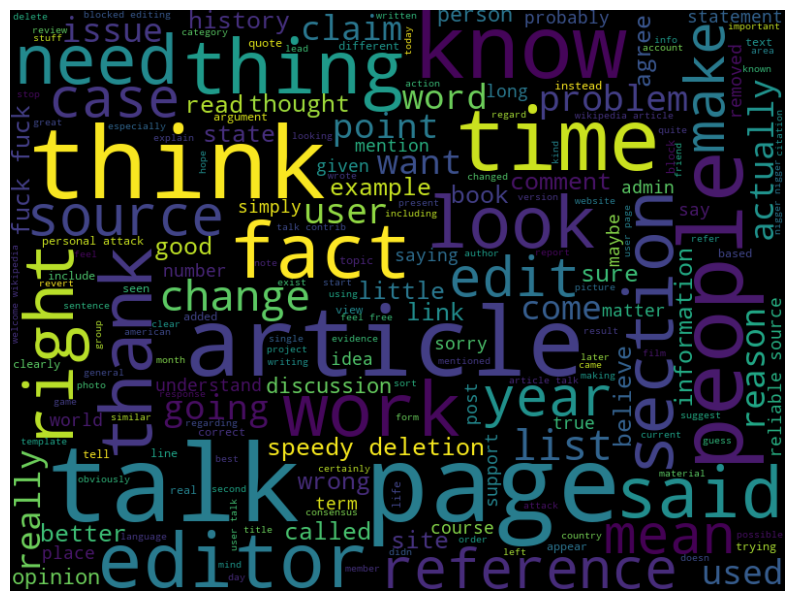

In [24]:
# Visualization
#!pip install wordcloud
from wordcloud import WordCloud
all_words =' '.join([i for i in dataset['Text']])
wc = WordCloud(width=800,height=600,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

Class Distribution

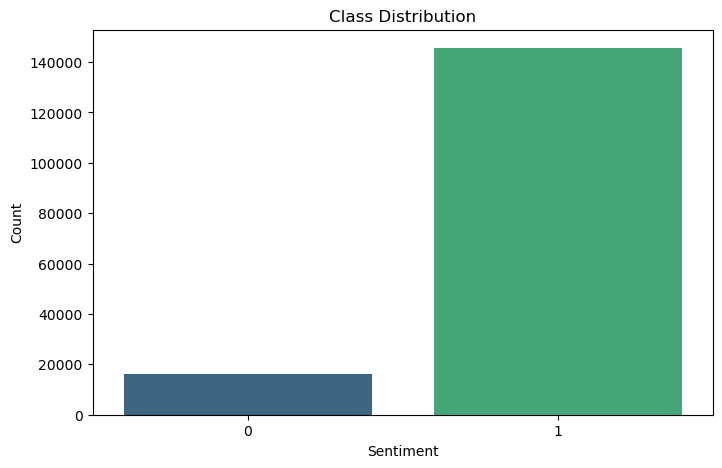

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='sentiment', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [26]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return tokens

dataset['Tokens'] = dataset['Text'].apply(preprocess_text)

In [27]:
#!pip install vaderSentiment

In [28]:
from collections import Counter
word_freq = Counter([word for tokens in dataset['Tokens'] for word in tokens])
print(word_freq)

Counter({'article': 57676, 'wikipedia': 48501, 'page': 46483, 'talk': 37882, 'like': 28793, 'think': 20203, 'know': 19278, 'people': 18538, 'edit': 18294, 'articles': 16784, 'time': 16153, 'user': 14588, 'thanks': 13949, 'good': 13518, 'make': 13210, 'information': 12178, 'want': 11726, 'deletion': 11519, 'sources': 11367, 'image': 11066, 'help': 10758, 'pages': 10711, 'source': 10436, 'editing': 10349, 'need': 10254, 'section': 10174, 'fuck': 10085, 'edits': 9984, 'thank': 9946, 'really': 9540, 'used': 9385, 'discussion': 9142, 'deleted': 9108, 'work': 8897, 'right': 8767, 'point': 8634, 'read': 8339, 'look': 8284, 'wiki': 8112, 'fact': 7865, 'list': 7681, 'link': 7636, 'said': 7547, 'going': 7476, 'blocked': 7375, 'stop': 7289, 'content': 7219, 'block': 7048, 'http': 7007, 'history': 7004, 'added': 6940, 'editors': 6774, 'removed': 6640, 'free': 6561, 'welcome': 6530, 'note': 6513, 'sure': 6487, 'case': 6451, 'place': 6435, 'better': 6348, 'vandalism': 6248, 'reason': 6239, 'comment'

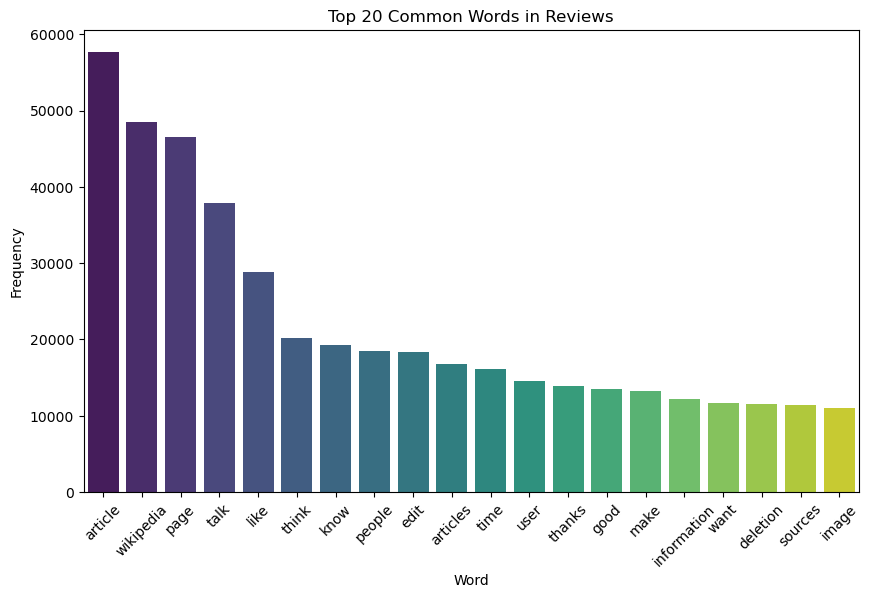

In [29]:
common_words = word_freq.most_common(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='viridis')
plt.title('Top 20 Common Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering
Length Feature

In [30]:
# length frature
dataset['Text Length'] = dataset['Text'].apply(len)  # Character count

dataset['Word Count'] = dataset['Text'].apply(lambda x: len(x.split()))  # Word count
print(dataset['Text Length'])
print(dataset['Word Count'])

0         135
1          61
2         124
3         335
4          25
         ... 
161565    116
161566    190
161567    780
161568    142
161569    184
Name: Text Length, Length: 161570, dtype: int64
0          18
1           8
2          17
3          42
4           4
         ... 
161565     16
161566     29
161567    111
161568     20
161569     26
Name: Word Count, Length: 161570, dtype: int64


In [31]:
dataset

,id,Text,toxic,sentiment,highly_malignant,rude,threat,abuse,loathe,Tokens,Text Length,Word Count
0,0000997932d777bf,explanation edits username hardcore metallica reverted weren vandalisms just closure voted york dolls remove template talk page retired,0,1,0,0,0,0,0,"[explanation, edits, username, hardcore, metallica, reverted, vandalisms, closure, voted, york, dolls, remove, template, talk, page, retired]",135,18
1,000103f0d9cfb60f,matches background colour seemingly stuck thanks talk january,0,1,0,0,0,0,0,"[matches, background, colour, seemingly, stuck, thanks, talk, january]",61,8
2,000113f07ec002fd,really trying edit just constantly removing relevant information talking edits instead talk page care formatting actual info,0,1,0,0,0,0,0,"[really, trying, edit, constantly, removing, relevant, information, talking, edits, instead, talk, page, care, formatting, actual, info]",124,17
3,0001b41b1c6bb37e,make real suggestions improvement wondered section statistics later subsection types accidents think references need tidying exact format date for...,0,1,0,0,0,0,0,"[make, real, suggestions, improvement, wondered, section, statistics, later, subsection, types, accidents, think, references, need, tidying, exact...",335,42
4,0001d958c54c6e35,hero chance remember page,0,1,0,0,0,0,0,"[hero, chance, remember, page]",25,4
...,...,...,...,...,...,...,...,...,...,...,...,...
161565,0565fcebf5b16273,delicious recipe ingredients pricy mind price point makes wonderful waffle combine waring waffle maker waffle heaven,0,0,0,0,0,0,0,"[delicious, recipe, ingredients, pricy, mind, price, point, makes, wonderful, waffle, combine, waring, waffle, maker, waffle, heaven]",116,16
161566,05674d53bc1e4518,laugh reviews said work little butter worth cook come perfect everytime crisp outside fluffy inside family loves loves thing different instead ext...,0,1,0,0,0,0,0,"[laugh, reviews, said, work, little, butter, worth, cook, come, perfect, everytime, crisp, outside, fluffy, inside, family, loves, loves, thing, d...",190,29
161567,056791b78692a149,read favorable reviews pancake amazon quite ordered came outdoor camping stores christmas using make dieting harder honestly enjoyed struggle panc...,0,1,0,0,0,0,0,"[read, favorable, reviews, pancake, amazon, quite, ordered, came, outdoor, camping, stores, christmas, using, make, dieting, harder, honestly, enj...",780,111
161568,05687bcb86751fc2,expecting great things based reviews good great believe waffles bisquick just tasty costs quite instructions easy follow like canister storage,0,0,0,0,0,0,0,"[expecting, great, things, based, reviews, good, great, believe, waffles, bisquick, tasty, costs, quite, instructions, easy, follow, like, caniste...",142,20


## Split Data

In [32]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", score) 
    print("sentence was rated as ", score['neg']*100, "% Negative") 
    print("sentence was rated as ", score['neu']*100, "% Neutral") 
    print("sentence was rated as ", score['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if score['compound'] >= 0.075 : 
        print("Very Positive") 
  
    elif score['compound'] <= - 0.075 : 
        print("very Negative") 
    elif score['compound'] <= - 0.05 : 
        vsentiment="Negative"
    elif score['compound'] >= 0.05 : 
        vsentiment="Positive" 
    else : 
        print("Neutral")

In [33]:
#Sentiment Analysis with AFINN
# it is used to it's used to assign sentiment scores to words or text
#!pip install afinn
from afinn import Afinn
afn = Afinn(emoticons=True)

In [34]:
review = dataset['Text'][90]
print(review)

personal attacks fruit brute apologies critical feel comments fruit brute debate reasonable diplomatic disagree assertion initial sentence makes look juvenile learn face goofed long life attacks certainly border personal attack bart eighty included comment juvenile expect apologise want make clear consider comments debate inappropriate think members community agree talk


In [35]:
def get_sentimentscore(review):
    score = analyser.polarity_scores(review)
    vander_positive=score['pos']*100
    vander_negative=score['neg']*100
    if score['compound'] >= 0.075 : 
        vsentiment="Very Positive" 
    elif score['compound'] >= 0.05 : 
        vsentiment="Positive" 
    elif score['compound'] <= - 0.075 : 
        vsentiment="very Negative" 
  
    elif score['compound'] <= - 0.05 : 
        vsentiment="Negative" 
  
    else:  
        vsentiment="Neutral" 
       
    afn_score=afn.score(review)
    if(afn_score > 0 and afn_score <3):
        afn_sentiment="Positive"
    elif(afn_score>=3 ):
        afn_sentiment="very Positive"
    elif(afn_score < 0 and afn_score >-3):
        afn_sentiment="Negative"
    elif(afn_score < 0 and afn_score <=-3):
        afn_sentiment="very Negative"
    else:
        afn_sentiment="Neutral" 
    return pd.Series([vander_positive, vander_negative,vsentiment,afn_score,afn_sentiment])

In [36]:
print('Predicted Sentiment polarity:', sentiment_analyzer_scores(review))
print('Predicted Sentiment AFN polarity:', afn.score(review))

Overall sentiment dictionary is :  {'neg': 0.214, 'neu': 0.589, 'pos': 0.197, 'compound': -0.4767}
sentence was rated as  21.4 % Negative
sentence was rated as  58.9 % Neutral
sentence was rated as  19.7 % Positive
Sentence Overall Rated As very Negative
Predicted Sentiment polarity: None
Predicted Sentiment AFN polarity: -7.0


In [37]:
dataset[['vander_positive', 'vander_negative', 'vsentiment','afn_score','afn_sentiment']]=dataset['Text'].apply(get_sentimentscore)

In [38]:
dataset

,id,Text,toxic,sentiment,highly_malignant,rude,threat,abuse,loathe,Tokens,Text Length,Word Count,vander_positive,vander_negative,vsentiment,afn_score,afn_sentiment
0,0000997932d777bf,explanation edits username hardcore metallica reverted weren vandalisms just closure voted york dolls remove template talk page retired,0,1,0,0,0,0,0,"[explanation, edits, username, hardcore, metallica, reverted, vandalisms, closure, voted, york, dolls, remove, template, talk, page, retired]",135,18,0.0,0.0,Neutral,0.0,Neutral
1,000103f0d9cfb60f,matches background colour seemingly stuck thanks talk january,0,1,0,0,0,0,0,"[matches, background, colour, seemingly, stuck, thanks, talk, january]",61,8,26.6,18.3,Very Positive,0.0,Neutral
2,000113f07ec002fd,really trying edit just constantly removing relevant information talking edits instead talk page care formatting actual info,0,1,0,0,0,0,0,"[really, trying, edit, constantly, removing, relevant, information, talking, edits, instead, talk, page, care, formatting, actual, info]",124,17,16.7,0.0,Very Positive,2.0,Positive
3,0001b41b1c6bb37e,make real suggestions improvement wondered section statistics later subsection types accidents think references need tidying exact format date for...,0,1,0,0,0,0,0,"[make, real, suggestions, improvement, wondered, section, statistics, later, subsection, types, accidents, think, references, need, tidying, exact...",335,42,14.8,9.4,Very Positive,3.0,very Positive
4,0001d958c54c6e35,hero chance remember page,0,1,0,0,0,0,0,"[hero, chance, remember, page]",25,4,73.7,0.0,Very Positive,4.0,very Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161565,0565fcebf5b16273,delicious recipe ingredients pricy mind price point makes wonderful waffle combine waring waffle maker waffle heaven,0,0,0,0,0,0,0,"[delicious, recipe, ingredients, pricy, mind, price, point, makes, wonderful, waffle, combine, waring, waffle, maker, waffle, heaven]",116,16,45.1,0.0,Very Positive,9.0,very Positive
161566,05674d53bc1e4518,laugh reviews said work little butter worth cook come perfect everytime crisp outside fluffy inside family loves loves thing different instead ext...,0,1,0,0,0,0,0,"[laugh, reviews, said, work, little, butter, worth, cook, come, perfect, everytime, crisp, outside, fluffy, inside, family, loves, loves, thing, d...",190,29,47.2,0.0,Very Positive,15.0,very Positive
161567,056791b78692a149,read favorable reviews pancake amazon quite ordered came outdoor camping stores christmas using make dieting harder honestly enjoyed struggle panc...,0,1,0,0,0,0,0,"[read, favorable, reviews, pancake, amazon, quite, ordered, came, outdoor, camping, stores, christmas, using, make, dieting, harder, honestly, enj...",780,111,41.7,3.0,Very Positive,36.0,very Positive
161568,05687bcb86751fc2,expecting great things based reviews good great believe waffles bisquick just tasty costs quite instructions easy follow like canister storage,0,0,0,0,0,0,0,"[expecting, great, things, based, reviews, good, great, believe, waffles, bisquick, tasty, costs, quite, instructions, easy, follow, like, caniste...",142,20,52.8,0.0,Very Positive,12.0,very Positive


In [39]:
dataset.vsentiment.value_counts()

Very Positive    77453
very Negative    49679
Neutral          32376
Negative          1198
Positive           864
Name: vsentiment, dtype: int64

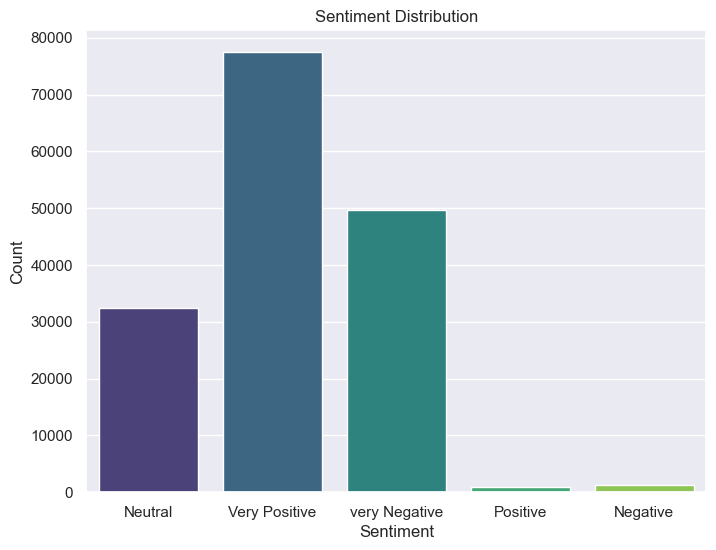

In [40]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=dataset, x='vsentiment', palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
#dataset.afn_sentiment.value_counts().plot(kind='bar')

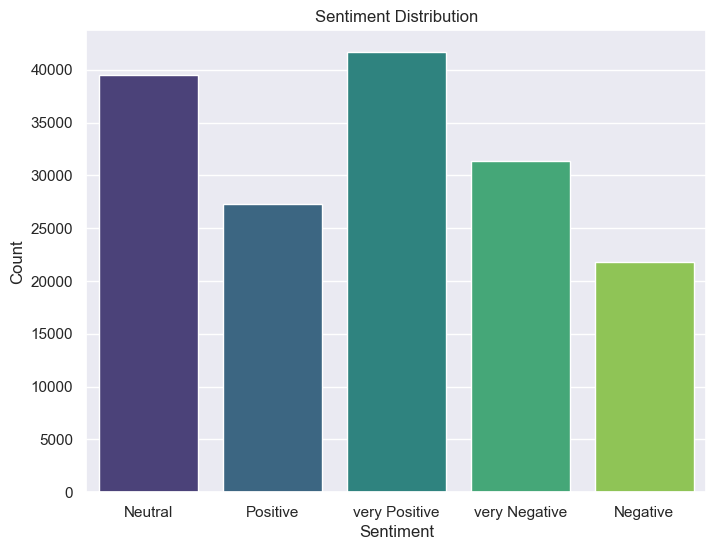

In [41]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=dataset, x='afn_sentiment', palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [42]:
dataset.afn_sentiment.value_counts()

very Positive    41659
Neutral          39458
very Negative    31405
Positive         27267
Negative         21781
Name: afn_sentiment, dtype: int64

## Train an ML model for Text Classification

## Choose a Model and Training
Logistic Regression

In [43]:
#Logistic Regression

#report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['Text'], dataset['sentiment'], test_size=0.1, random_state=42)

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:',accuracy)

report = classification_report(y_test, y_pred)
print(report)

Logistic Regression Accuracy: 0.9492480039611314
              precision    recall  f1-score   support

           0       0.91      0.53      0.67      1579
           1       0.95      0.99      0.97     14578

    accuracy                           0.95     16157
   macro avg       0.93      0.76      0.82     16157
weighted avg       0.95      0.95      0.94     16157



## Naive Bayes

In [44]:
#Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# Split the dataset into training and testing sets
X = dataset['Text']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the TF-IDF transformed training data
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Naive Bayes Accuracy:',accuracy)
print(report)

Naive Bayes Accuracy: 0.9398196859978131
              precision    recall  f1-score   support

           0       0.96      0.40      0.57      4758
           1       0.94      1.00      0.97     43713

    accuracy                           0.94     48471
   macro avg       0.95      0.70      0.77     48471
weighted avg       0.94      0.94      0.93     48471



## Random Forest Classifier

In [45]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest Accuracy:',accuracy_rf)
print(report_rf)

Random Forest Accuracy: 0.9423779166924553
              precision    recall  f1-score   support

           0       0.84      0.51      0.64      4758
           1       0.95      0.99      0.97     43713

    accuracy                           0.94     48471
   macro avg       0.89      0.75      0.80     48471
weighted avg       0.94      0.94      0.94     48471



In [46]:
dataset.to_csv('PRODUCT RISK MANAGEMENT.csv')

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline

# Load your CSV file
csv_path = "D:/Nlp/exeed/train.csv"
df = pd.read_csv(csv_path)

# Assume your CSV file has a 'Text' column containing reviews, a 'toxic' column indicating toxicity (0 for non-toxic, 1 for toxic), and a 'user_id' column

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels, train_user_ids, test_user_ids = train_test_split(
    df['Text'], df['toxic'], df['id'], test_size=0.2, random_state=42
)

# Create a pipeline with a TF-IDF vectorizer and a Naive Bayes classifier
model = make_pipeline(
    TfidfVectorizer(stop_words=stopwords.words('english'), tokenizer=word_tokenize),
    MultinomialNB()
)

# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
predictions = model.predict(test_data)

# Create a new DataFrame with toxic comments, their predictions, and user IDs
toxic_comments_df = pd.DataFrame({
    'id': test_user_ids[test_labels == 1],
    'Text': test_data[test_labels == 1],
    'Predicted Label': predictions[test_labels == 1]
})

# Save the new DataFrame to a CSV file
output_csv_path = "D:/Nlp/exeed/toxic_comments_predictions.csv"
toxic_comments_df.to_csv(output_csv_path, index=False)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('\nClassification Report:\n', classification_report(test_labels, predictions))

print(f'\nToxic comments and predictions saved to: {output_csv_path}')


Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     29280
           1       1.00      0.14      0.24      3034

    accuracy                           0.92     32314
   macro avg       0.96      0.57      0.60     32314
weighted avg       0.93      0.92      0.89     32314


Toxic comments and predictions saved to: D:/Nlp/exeed/toxic_comments_predictions.csv


In [56]:
dataset

,id,Text,toxic,sentiment,highly_malignant,rude,threat,abuse,loathe,Tokens,Text Length,Word Count,vander_positive,vander_negative,vsentiment,afn_score,afn_sentiment
0,0000997932d777bf,explanation edits username hardcore metallica reverted weren vandalisms just closure voted york dolls remove template talk page retired,0,1,0,0,0,0,0,"[explanation, edits, username, hardcore, metallica, reverted, vandalisms, closure, voted, york, dolls, remove, template, talk, page, retired]",135,18,0.0,0.0,Neutral,0.0,Neutral
1,000103f0d9cfb60f,matches background colour seemingly stuck thanks talk january,0,1,0,0,0,0,0,"[matches, background, colour, seemingly, stuck, thanks, talk, january]",61,8,26.6,18.3,Very Positive,0.0,Neutral
2,000113f07ec002fd,really trying edit just constantly removing relevant information talking edits instead talk page care formatting actual info,0,1,0,0,0,0,0,"[really, trying, edit, constantly, removing, relevant, information, talking, edits, instead, talk, page, care, formatting, actual, info]",124,17,16.7,0.0,Very Positive,2.0,Positive
3,0001b41b1c6bb37e,make real suggestions improvement wondered section statistics later subsection types accidents think references need tidying exact format date for...,0,1,0,0,0,0,0,"[make, real, suggestions, improvement, wondered, section, statistics, later, subsection, types, accidents, think, references, need, tidying, exact...",335,42,14.8,9.4,Very Positive,3.0,very Positive
4,0001d958c54c6e35,hero chance remember page,0,1,0,0,0,0,0,"[hero, chance, remember, page]",25,4,73.7,0.0,Very Positive,4.0,very Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161565,0565fcebf5b16273,delicious recipe ingredients pricy mind price point makes wonderful waffle combine waring waffle maker waffle heaven,0,0,0,0,0,0,0,"[delicious, recipe, ingredients, pricy, mind, price, point, makes, wonderful, waffle, combine, waring, waffle, maker, waffle, heaven]",116,16,45.1,0.0,Very Positive,9.0,very Positive
161566,05674d53bc1e4518,laugh reviews said work little butter worth cook come perfect everytime crisp outside fluffy inside family loves loves thing different instead ext...,0,1,0,0,0,0,0,"[laugh, reviews, said, work, little, butter, worth, cook, come, perfect, everytime, crisp, outside, fluffy, inside, family, loves, loves, thing, d...",190,29,47.2,0.0,Very Positive,15.0,very Positive
161567,056791b78692a149,read favorable reviews pancake amazon quite ordered came outdoor camping stores christmas using make dieting harder honestly enjoyed struggle panc...,0,1,0,0,0,0,0,"[read, favorable, reviews, pancake, amazon, quite, ordered, came, outdoor, camping, stores, christmas, using, make, dieting, harder, honestly, enj...",780,111,41.7,3.0,Very Positive,36.0,very Positive
161568,05687bcb86751fc2,expecting great things based reviews good great believe waffles bisquick just tasty costs quite instructions easy follow like canister storage,0,0,0,0,0,0,0,"[expecting, great, things, based, reviews, good, great, believe, waffles, bisquick, tasty, costs, quite, instructions, easy, follow, like, caniste...",142,20,52.8,0.0,Very Positive,12.0,very Positive


## Done by 
Jaya Krishna 